# Mechanical Turk Summary Stats #
**Author** Andrew Larkin <br>
**Principal Investigator:** Perry Hystad <br>
**Date Created:** May 13,2020 <br>
**Summary** Analyze records collected from mechanical turk.  Specifically, the operations below will calculate summary statistics, test for model bias against specific subsets of data (e.g. stratify by urban class), evaluate impact of sampling methodology and survey delivery, and create figures and tables for publication.

### import libararies and define global constants ###

In [1]:
import math
import random
from trueskill import Rating, quality_1vs1, rate_1vs1
import pandas as ps
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from scipy import stats
from matplotlib.ticker import PercentFormatter
import import_ipynb
from mtAPIWrapper import MTWrapper
import mTurkAnalyzer 
import importlib
import globalConstants as gConst
import SQL_API
import BiasEstimator
import TSAnalyzer

importing Jupyter notebook from mtAPIWrapper.ipynb
importing Jupyter notebook from mTurkAnalyzer.ipynb
importing Jupyter notebook from SQL_API.ipynb
importing Jupyter notebook from BiasEstimator.ipynb
importing Jupyter notebook from TSAnalyzer.ipynb


## Section 1: preprocess mechanical turk voting records ##

In [5]:
# get mturk metadata from Amazon
mtAPI = MTWrapper(gConst.ACCESS_KEY,gConst.ACCESS_SECRET,realSession=True)
mtAPI.setInfoAllHits()
mtMeta = mtAPI.getHitInfoAllHits()

got hit meta
nHits 510


In [2]:
# get mturk voting records from SQL database
sqlAPIAbs = SQL_API.SQL_API(gConst.PGDB,gConst.PGUSER,gConst.PGPWORD)
sqlAPIRel = SQL_API.SQL_API(gConst.PG_SIM_REL_DB,gConst.PGUSER,gConst.PGPWORD)
mtVotes = sqlAPIAbs.getMTRecords()

In [8]:
# merge metadata and voting records
mtRecords = mtVotes.merge(mtMeta,left_on='assign_id',right_on='mt_assign_id',how='inner')
print(len(mtRecords['assign_id']))

9192


In [5]:
# only load records from csv if performing a follow up analysis
import mTurkAnalyzer
importlib.reload(mTurkAnalyzer)
mtRecords = ps.read_csv(gConst.MTURK_RECORDS)
mta = mTurkAnalyzer.MTurkAnalyzer(timeCutoff=30)
mta.setRecords(mtRecords)
# remove records with flags
mta.cleanUpRecords()
# estimate error rate within the mechanical turk dataset
errStats,repeatStats = mta.calcErrStats()
mta.saveRecordsToCSV(gConst.MTURK_RECORDS)
errStats

importing Jupyter notebook from mTurkAnalyzer.ipynb


mTurkAnalyzer.ipynb:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "                intensity = intensity[intensityCutoff<cutOff]\n",
mTurkAnalyzer.ipynb:370: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "                means.append(intensity.mean())\n",
mTurkAnalyzer.ipynb:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

,dataset,err rate,n
0,All Records,5.831158,9192
1,QA Screened,2.915579,8924
2,Worker Screened,1.559548,8707
3,Time Screened,1.559947,8085


In [6]:
# summary statistics of repeat mechanical turk participants
repeatStats

,n participants,records/participant,% contribution
1,3372,1,41.706865
2,895,2,22.139765
3,304,3,11.280148
4,136,4,6.728510
5,84,5,5.194805
6,42,6,3.116883
7,41,7,3.549784
8,28,8,2.770563
9,23,9,2.560297
10,3,10,0.371058


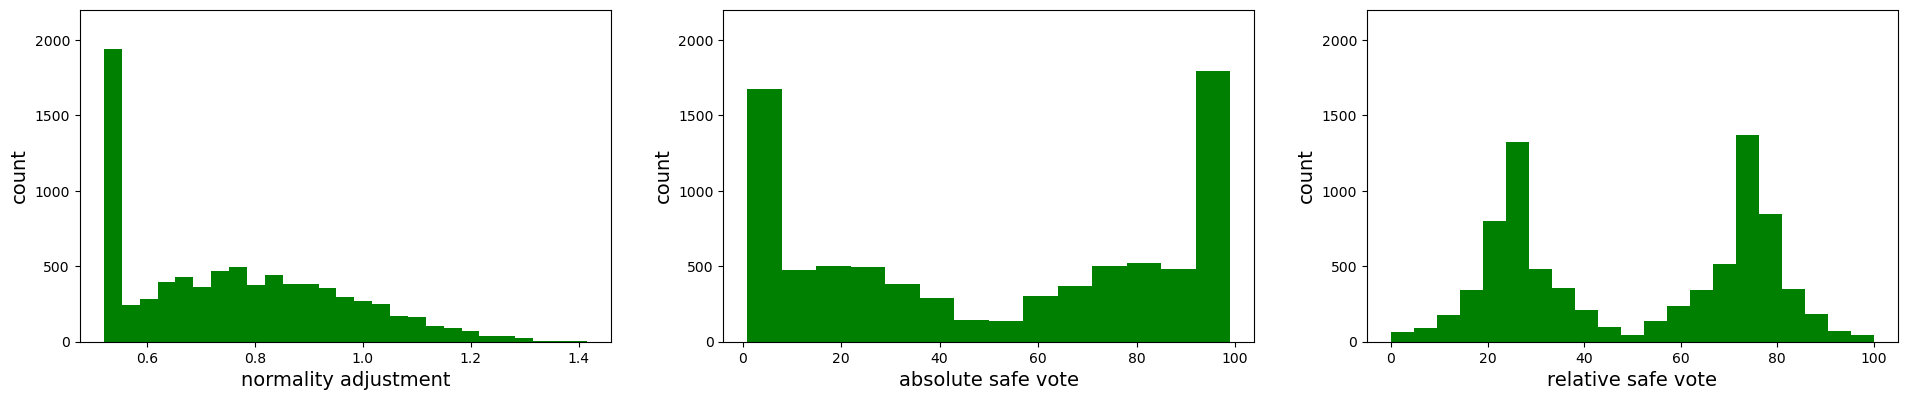

In [4]:
# evaluate the impacts of transforming the safe outcome label with the normality adjustment
mta.getAdjustFig(True)

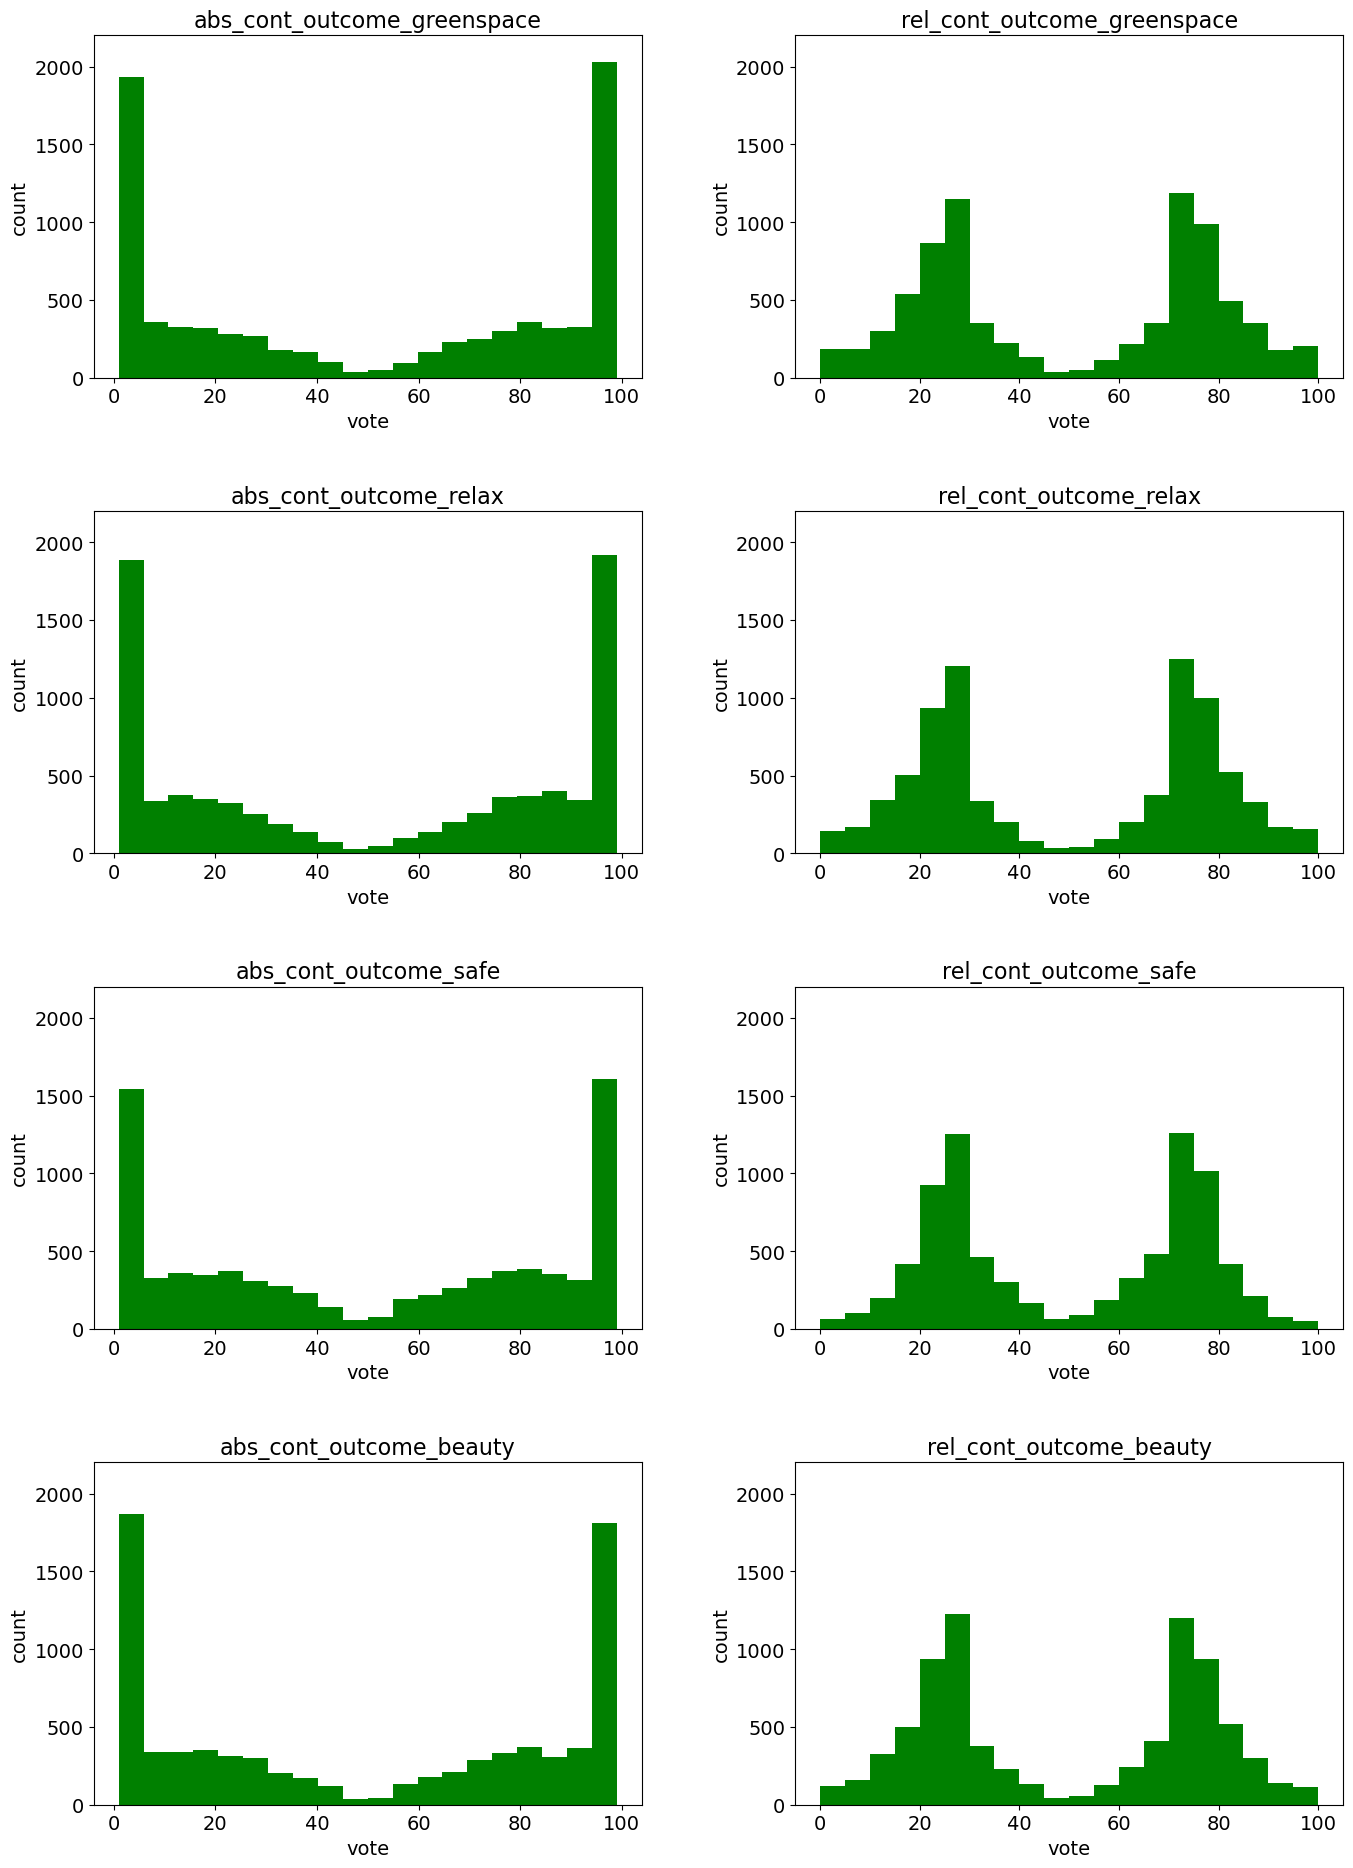

In [5]:
# histgram vote intensity for all outcome labels
mta.createHistograms(True)

## Section 2: preprocess trueskill scores ##

In [7]:
def loadScoresToTS_Analyzer(tsa,sqlAPI):
    for label in gConst.OUTCOME_LABELS:
        scores = sqlAPI.getTSRecords(label)
        tsa.loadScores(scores,label)

In [9]:
sqlAPIAbs = SQL_API.SQL_API(gConst.PGDB,gConst.PGUSER,gConst.PGPWORD)
sqlAPIRel = SQL_API.SQL_API(gConst.PG_SIM_REL_DB,gConst.PGUSER,gConst.PGPWORD)

tsaAbs = TSAnalyzer.TSAnalyzer(gConst.OUTCOME_LABELS)
loadScoresToTS_Analyzer(tsaAbs,sqlAPIAbs)
tsaRel = TSAnalyzer.TSAnalyzer(gConst.OUTCOME_LABELS)
loadScoresToTS_Analyzer(tsaRel,sqlAPIRel)
tsaAbs.calcAvgTSAllLabels()
tsaAbs.writeCSV(gConst.TS_SCORES)
tsaRel.calcAvgTSAllLabels()
tsaRel.writeCSV(gConst.TS_SCORES_REL)

completed loading scores for label greenspace
completed loading scores for label relax
completed loading scores for label safe
completed loading scores for label beauty
completed loading scores for label greenspace
completed loading scores for label relax
completed loading scores for label safe
completed loading scores for label beauty
finished calculating avg ts scores for all labels
finished writing true skill scores to csv file at filepath C:/users/Andy/Desktop/Training/mechTurkStatsAbs.csv
finished calculating avg ts scores for all labels
finished writing true skill scores to csv file at filepath C:/users/Andy/Desktop/Training/mechTurkStatsRel.csv


In [14]:
#viewAngleStats = tsaAbs.getDescrStatsByViewingAngle()
#viewAngleStats['relax']

#urbanCatStats = tsaAbs.getDescriptiveStatsByUrbanCat()
#urbanCatStats['beauty']
#tsaAbs.calcAvgTSAllLabels()
#descrStats = tsaAbs.getDescriptiveStatsAllLabels()
#descrStats[3]
#corMat = tsaAbs.getCorMatrix()
#corMat.corr()

,n_straight,avg_mu_straight,avg_sigma_straight,n_side,avg_mu_side,avg_sigma_side
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,14.253333,24.983521,2.581795,13.883333,25.007436,2.552786
std,3.378092,5.549271,0.364100,3.225481,4.847869,0.341963
min,5.000000,9.294230,1.639883,7.000000,11.151242,1.785495
25%,12.000000,21.489004,2.323613,12.000000,21.896273,2.310964
50%,14.000000,25.206290,2.562895,14.000000,25.230330,2.509495
75%,16.000000,28.894767,2.780704,16.000000,28.245524,2.759047
max,30.000000,39.738521,4.138523,27.000000,36.859348,3.949068


In [10]:
be = BiasEstimator.BiasEstimator(mta,tsaAbs,tsaRel)
be.calcAvgImgBiasByRegionAllLabels()
biasDict = be.getBiasDict()

completed calculating bias for label: greenspace
completed calculating bias for label: relax
completed calculating bias for label: safe
completed calculating bias for label: beauty


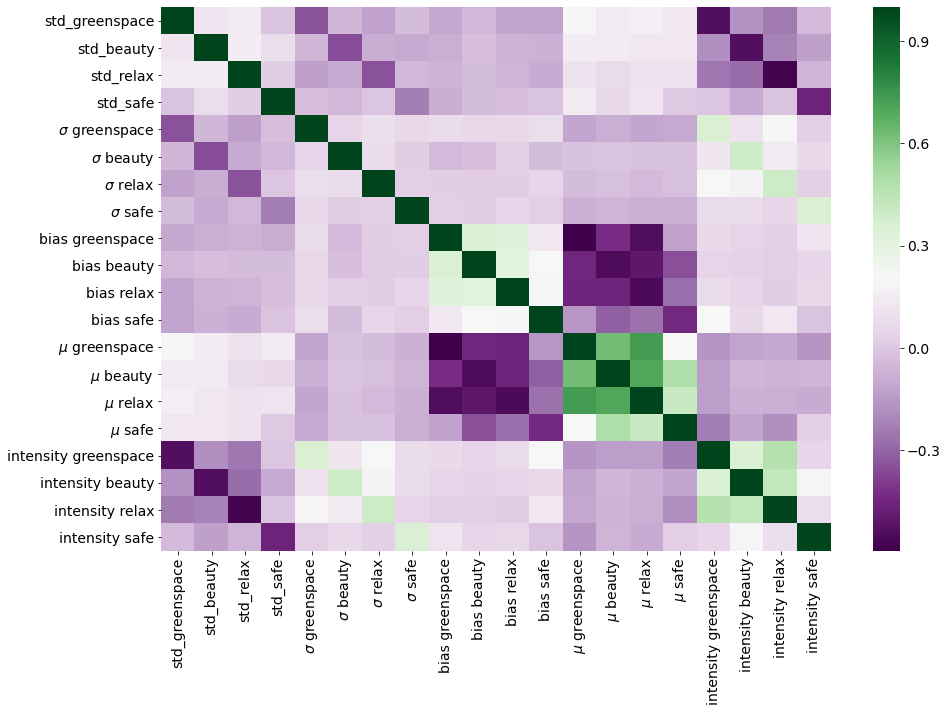

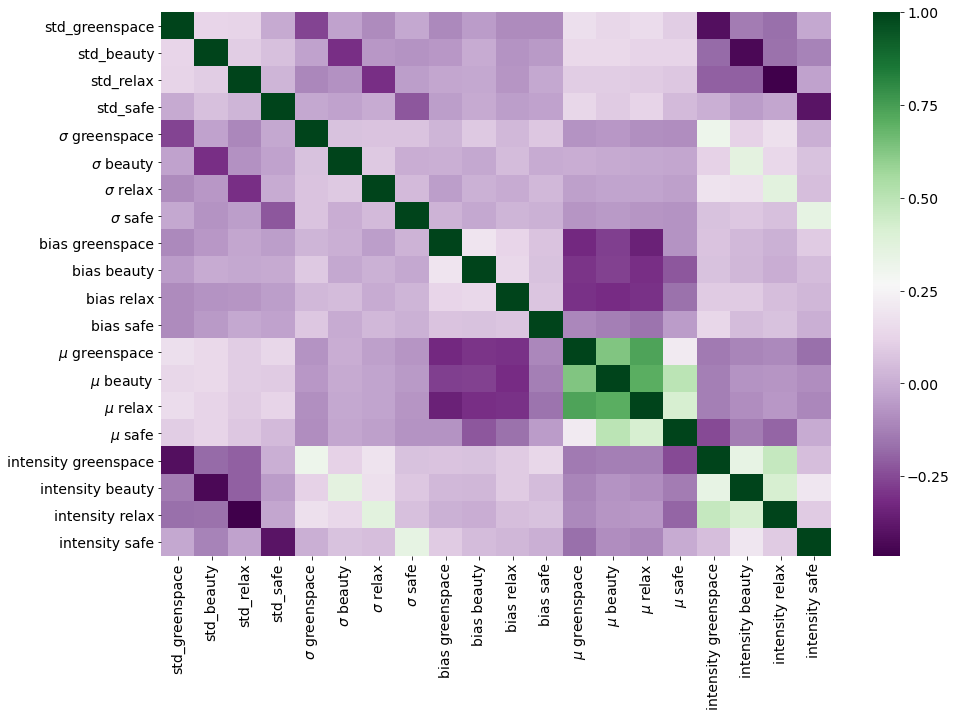

,n_greenspace,avg_mu_greenspace,avg_sigma_greenspace,abs_mu_greenspace,bias_greenspace,std_greenspace,image_id,n_beauty,avg_mu_beauty,avg_sigma_beauty,...,avg_sigma_relax,abs_mu_relax,bias_relax,std_relax,n_safe,avg_mu_safe,avg_sigma_safe,abs_mu_safe,bias_safe,std_safe
0,19,31.822135,2.006976,6.822135,-2.472496,20.318497,xbfxOvOLpSV1LU4Z2FjP1g_90,11,28.751310,2.664246,...,2.667758,4.209146,-6.013716,21.212931,14,25.347717,2.208575,0.347717,0.766617,19.844106
1,9,24.098115,2.574785,0.901885,-2.449836,28.506618,ZSAzkwG3VtuXct9SVWGPVg_179,7,25.276623,3.104496,...,2.653670,1.112218,3.602746,26.391014,13,26.041268,2.393556,1.041268,-1.314291,22.466144
2,13,19.947711,2.554720,5.052289,-2.829878,17.027326,b21bEsbeKpJ7FTlruli9Hw_181,12,24.461951,2.459832,...,2.611804,0.699320,-0.884263,18.676092,12,28.069630,2.424075,3.069630,0.360079,21.075370
3,12,18.083170,2.975042,6.916830,2.386536,16.463986,EWqf-geqThI2KmipfRW30A_203,14,24.231515,2.205146,...,2.609153,0.866786,-2.255600,33.963082,12,24.794011,2.337484,0.205989,2.615240,21.520325
4,17,26.356775,2.069740,1.356775,-1.119952,19.539337,VkuxFujlcFH1jlCFhM_x1A_125,19,27.697584,1.918863,...,2.456074,3.054427,-2.860028,23.394901,10,29.553057,2.971757,4.553057,-2.039702,15.313637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,12,29.412374,2.742952,4.412374,1.351038,22.784081,MxuwNQMr74KC2gu_3Ii43A_340,9,24.910311,2.944952,...,2.129323,3.431678,0.603602,20.626701,13,25.451981,2.306939,0.451981,-0.546891,26.749313
1196,18,34.096198,2.481120,9.096198,-1.721236,12.097368,4ID3wROP5H1kFm0f8Qgcqg_89,14,30.410279,2.667976,...,2.637986,5.847848,-1.479250,18.115376,15,26.410664,2.264416,1.410664,-4.199103,22.950477
1197,19,22.847657,2.006195,2.152343,-0.819850,22.175611,bINIpRtaIQ33mzJVTZ-xvA_267,12,29.803875,2.661435,...,2.678662,3.845816,-0.018793,18.669095,18,25.191405,2.043452,0.191405,-1.520322,24.130138
1198,7,32.538892,3.684983,7.538892,-0.902655,8.017461,3GwCOcbPG3G25chMs2j0Hg_189,13,27.358893,2.408707,...,3.018722,1.179668,4.040747,16.532317,14,28.952162,2.321895,3.952162,2.677786,22.206692


In [17]:
#be = BiasEstimator.BiasEstimator(mta,tsaAbs,tsaRel,biasDict=biasDict)
#be.plotSumstats()
#corMatrix = be.getCorMatrix("rel")
#corMatrix.corr()
be.getCorPlot("abs",False,gConst.TS_ABS_COR_IMG_PLAIN)
be.getCorPlot("rel",False,gConst.TS_REL_COR_IMG_PLAIN)
# calculate summary statistics
#a = be.getDescriptiveStatsAllLabels()
#statsByViewingAngle = be.getDescrStatsByViewingAngle(False)


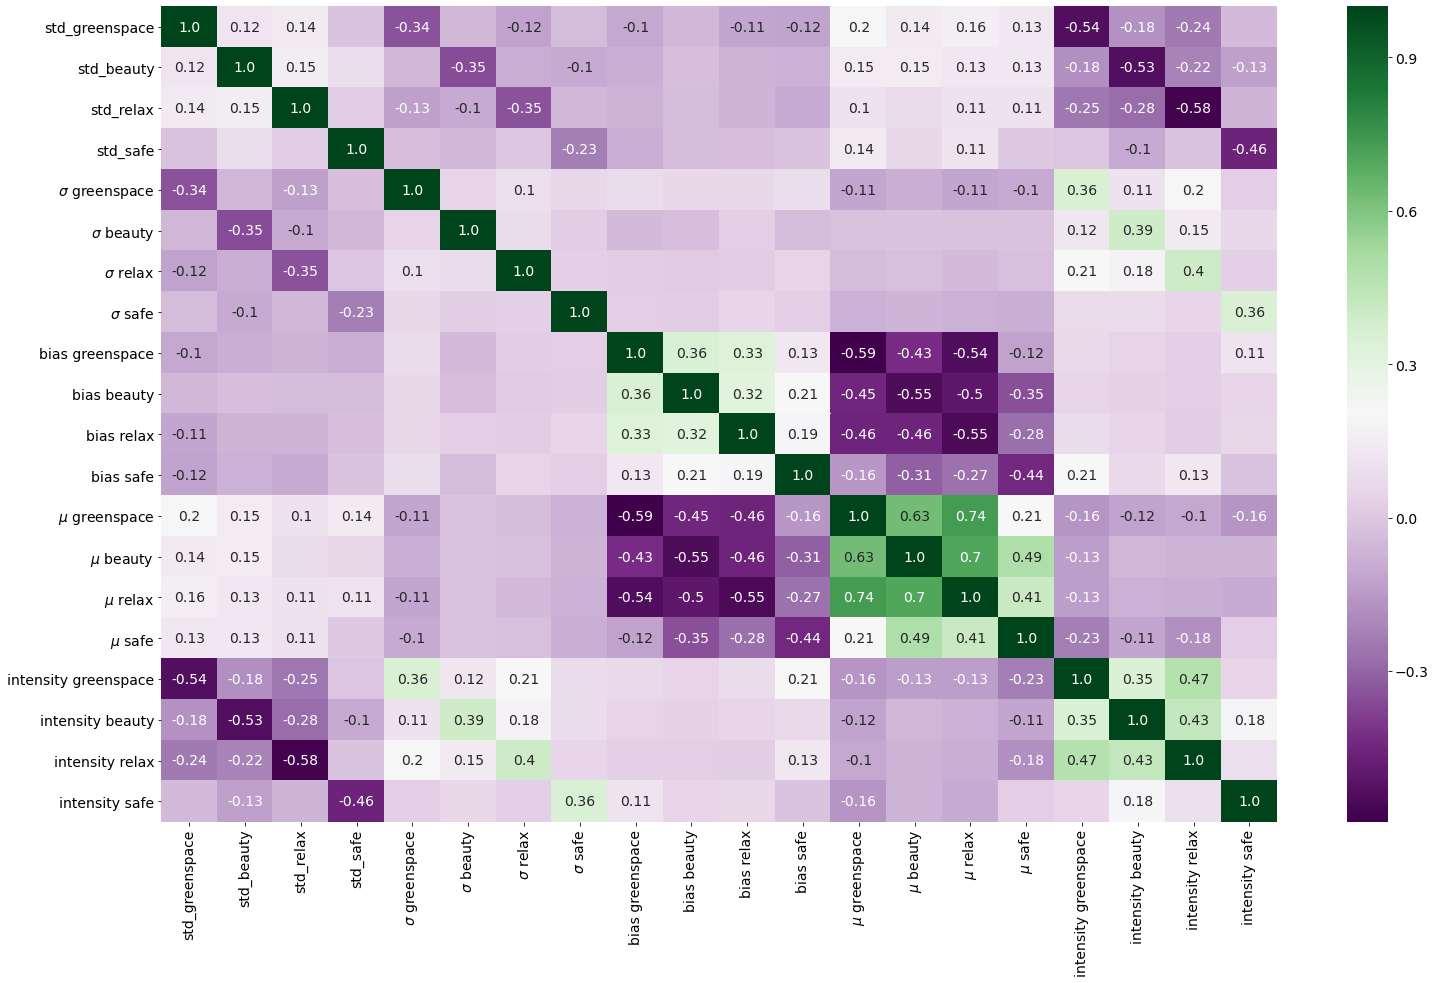

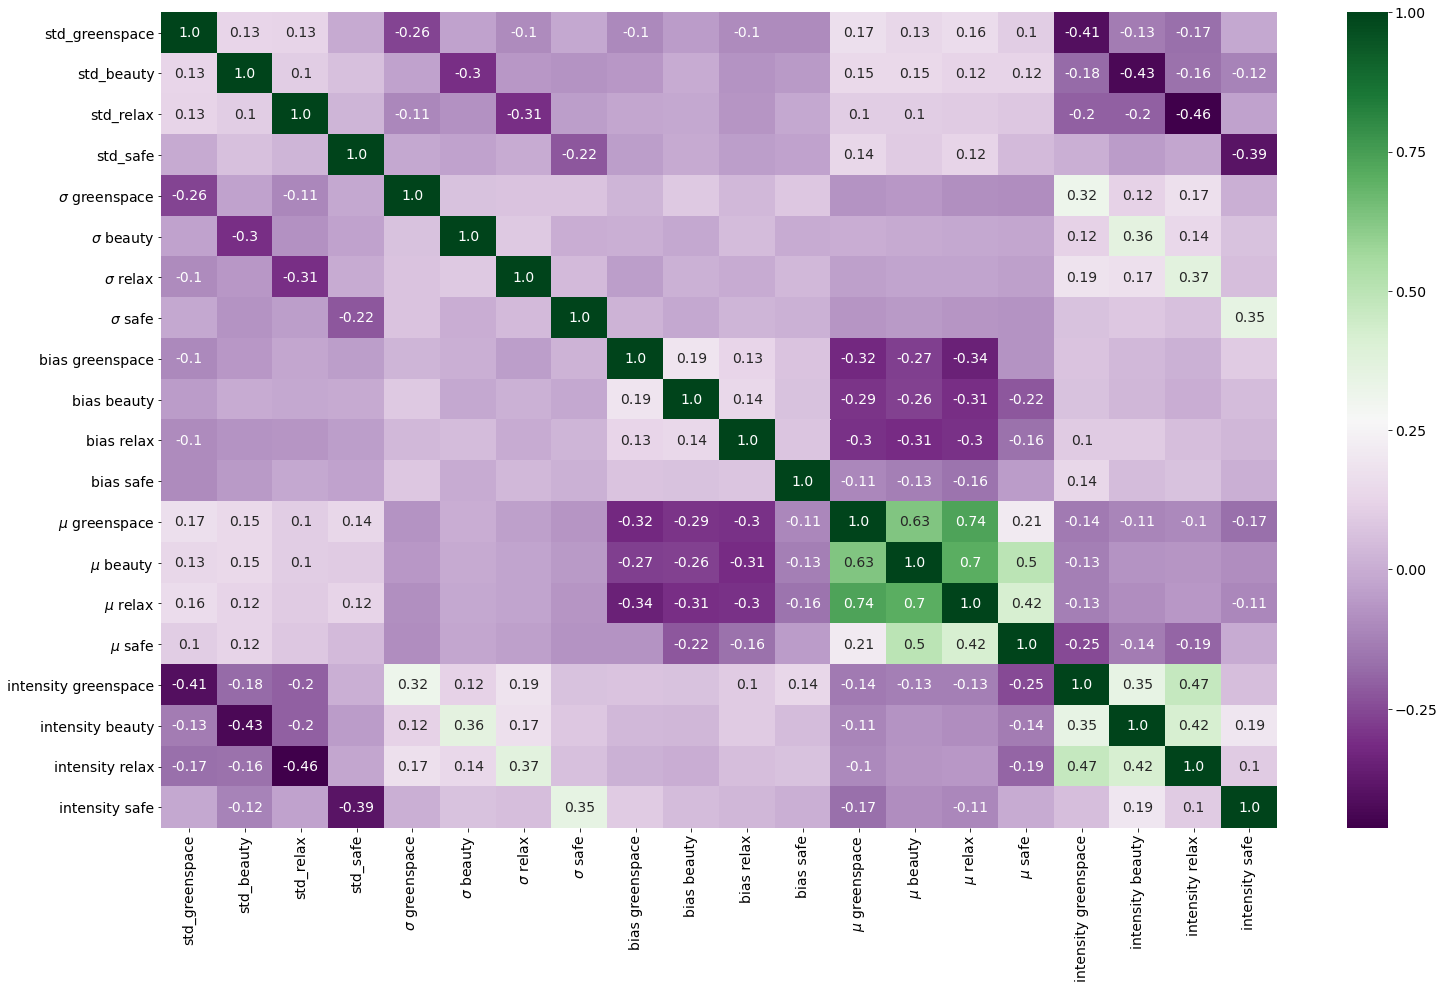

,n_greenspace,avg_mu_greenspace,avg_sigma_greenspace,abs_mu_greenspace,bias_greenspace,std_greenspace,image_id,n_beauty,avg_mu_beauty,avg_sigma_beauty,...,avg_sigma_relax,abs_mu_relax,bias_relax,std_relax,n_safe,avg_mu_safe,avg_sigma_safe,abs_mu_safe,bias_safe,std_safe
0,19,31.822135,2.006976,6.822135,-2.472496,20.318497,xbfxOvOLpSV1LU4Z2FjP1g_90,11,28.751310,2.664246,...,2.667758,4.209146,-6.013716,21.212931,14,25.347717,2.208575,0.347717,0.766617,19.844106
1,9,24.098115,2.574785,0.901885,-2.449836,28.506618,ZSAzkwG3VtuXct9SVWGPVg_179,7,25.276623,3.104496,...,2.653670,1.112218,3.602746,26.391014,13,26.041268,2.393556,1.041268,-1.314291,22.466144
2,13,19.947711,2.554720,5.052289,-2.829878,17.027326,b21bEsbeKpJ7FTlruli9Hw_181,12,24.461951,2.459832,...,2.611804,0.699320,-0.884263,18.676092,12,28.069630,2.424075,3.069630,0.360079,21.075370
3,12,18.083170,2.975042,6.916830,2.386536,16.463986,EWqf-geqThI2KmipfRW30A_203,14,24.231515,2.205146,...,2.609153,0.866786,-2.255600,33.963082,12,24.794011,2.337484,0.205989,2.615240,21.520325
4,17,26.356775,2.069740,1.356775,-1.119952,19.539337,VkuxFujlcFH1jlCFhM_x1A_125,19,27.697584,1.918863,...,2.456074,3.054427,-2.860028,23.394901,10,29.553057,2.971757,4.553057,-2.039702,15.313637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,12,29.412374,2.742952,4.412374,1.351038,22.784081,MxuwNQMr74KC2gu_3Ii43A_340,9,24.910311,2.944952,...,2.129323,3.431678,0.603602,20.626701,13,25.451981,2.306939,0.451981,-0.546891,26.749313
1196,18,34.096198,2.481120,9.096198,-1.721236,12.097368,4ID3wROP5H1kFm0f8Qgcqg_89,14,30.410279,2.667976,...,2.637986,5.847848,-1.479250,18.115376,15,26.410664,2.264416,1.410664,-4.199103,22.950477
1197,19,22.847657,2.006195,2.152343,-0.819850,22.175611,bINIpRtaIQ33mzJVTZ-xvA_267,12,29.803875,2.661435,...,2.678662,3.845816,-0.018793,18.669095,18,25.191405,2.043452,0.191405,-1.520322,24.130138
1198,7,32.538892,3.684983,7.538892,-0.902655,8.017461,3GwCOcbPG3G25chMs2j0Hg_189,13,27.358893,2.408707,...,3.018722,1.179668,4.040747,16.532317,14,28.952162,2.321895,3.952162,2.677786,22.206692


In [24]:
be.getCorPlot("abs",True,gConst.TS_ABS_COR_IMG)
be.getCorPlot("rel",True,gConst.TS_REL_COR_IMG)

In [55]:
urbanCatStats = be.getDescriptiveStatsByUrbanCat()
urbanCatStats['greenspace']

,n_Seattle,avg_mu_Seattle,avg_sigma_Seattle,n_Urban,avg_mu_Urban,avg_sigma_Urban,n_Suburb,avg_mu_Suburb,avg_sigma_Suburb
count,600.000000,600.000000,600.000000,454.000000,454.000000,454.000000,146.000000,146.000000,146.000000
mean,13.500000,24.938330,2.533615,13.378855,25.010595,2.528547,13.671233,24.885369,2.507413
std,3.002503,4.499706,0.322828,3.185521,4.186971,0.320581,2.980649,4.223617,0.303111
min,6.000000,13.776440,1.862671,5.000000,14.435664,1.855114,6.000000,14.632699,1.953505
25%,11.000000,21.409024,2.288408,11.000000,22.127255,2.311946,12.000000,21.950748,2.308335
50%,13.000000,25.557796,2.488861,13.000000,25.464178,2.504133,14.000000,25.050529,2.469837
75%,16.000000,28.319686,2.729032,16.000000,28.039590,2.716075,15.000000,27.956217,2.685988
max,22.000000,34.397282,3.729475,23.000000,34.338867,3.614827,22.000000,34.452663,3.549490


In [10]:
descrStats = be.getDescriptiveStatsAllLabels()
descrStats[2]

,bMean,bStd,avg_mu_safe,avg_sigma_safe,abs_mu_safe,n_safe
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.010424,20.292969,24.965801,2.384247,2.341777,13.475000
std,2.625208,4.141410,2.940420,0.316874,1.777287,3.194716
min,-9.000960,4.999038,16.571681,1.607906,0.002911,6.000000
25%,-1.735367,17.571068,23.038948,2.158779,0.900442,11.000000
50%,-0.023352,20.327188,24.900327,2.345176,1.963848,13.000000
75%,1.754009,23.082108,26.964607,2.549377,3.454771,15.000000
max,8.649593,34.740908,32.863335,4.094736,8.428319,27.000000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

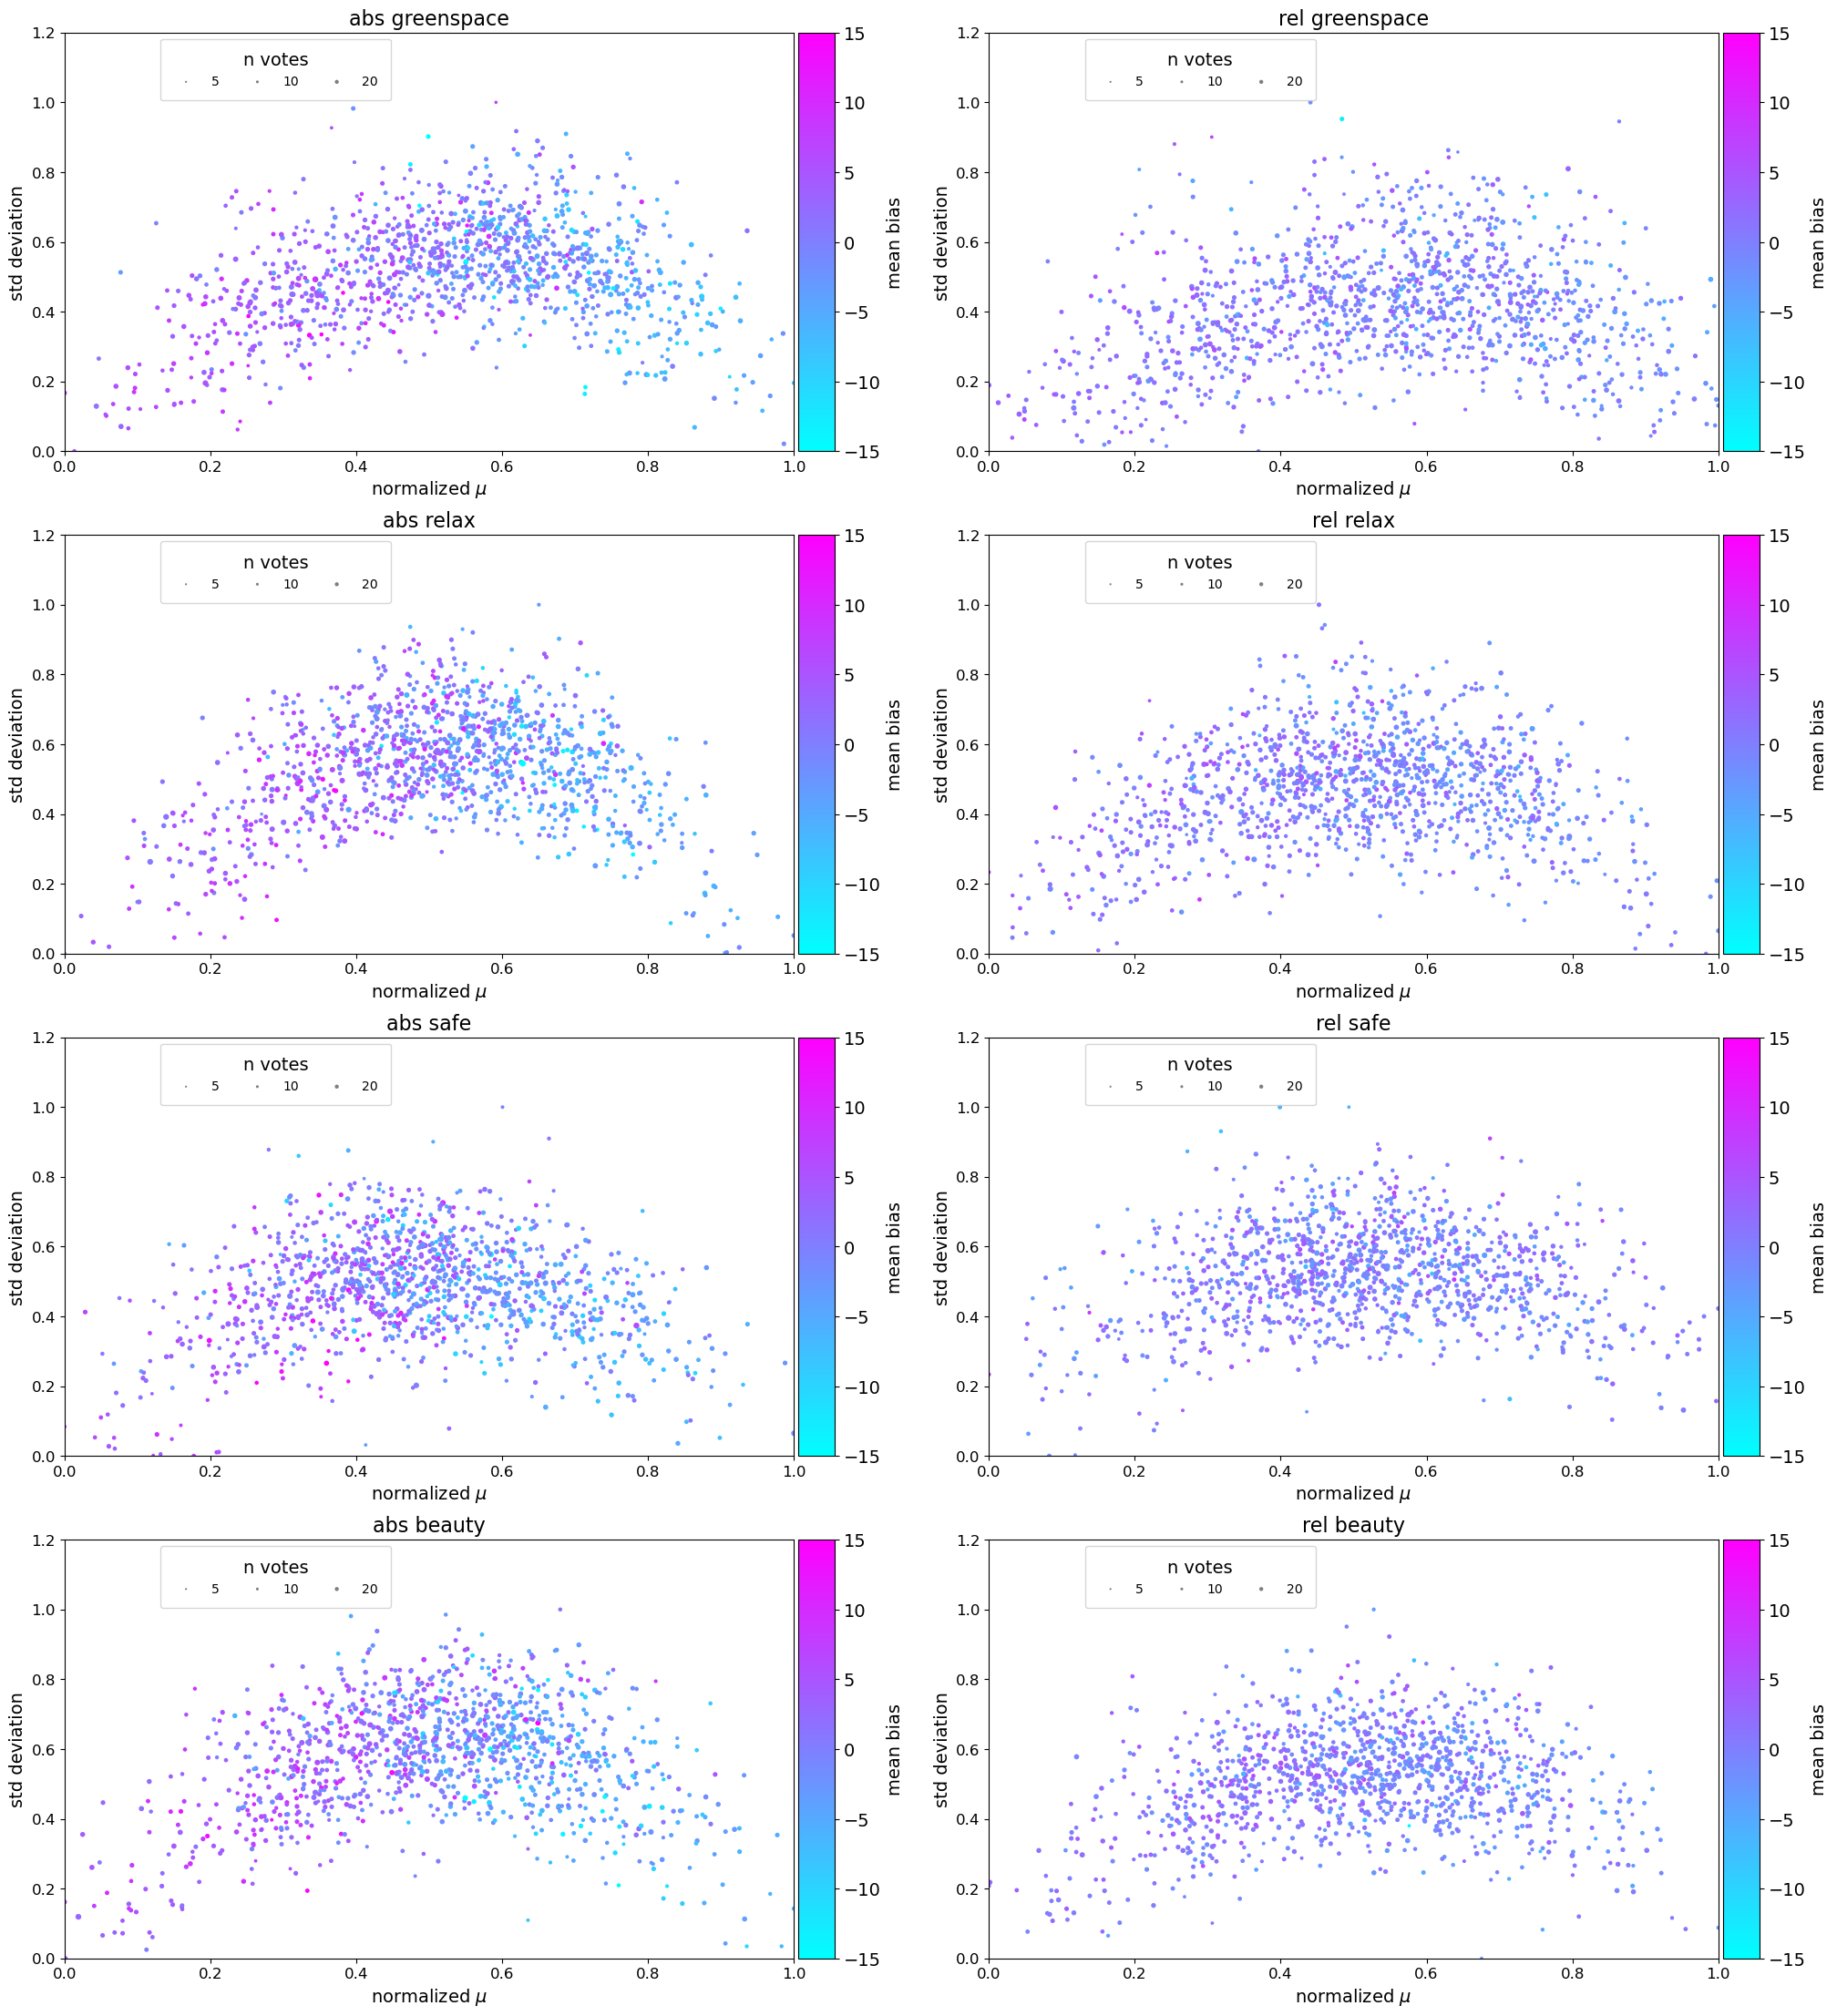

In [28]:
be.plotSumstats(gConst.TS_BIAS_IMG)

In [ ]:
#import BiasEstimator
mergedBiasDict = be.getMergedBiasDict()
#mergedBiasDict.head()
#mergedBiasDict.to_csv(gConst.TS_SCORES_GIS)
#be.plotTSScores() 

In [21]:
importlib.reload(BiasEstimator)
be = BiasEstimator.BiasEstimator(mta,tsaAbs,tsaRel,biasDict=biasDict)
be.createNormAdjust()
#mergedBiasDict = be.getMergedBiasDict()
#mergedBiasDict.head()
#mergedBiasDict.to_csv(gConst.TS_SCORES_GIS)

#be.plotTSScores()

importing Jupyter notebook from BiasEstimator.ipynb
creating adjusted measure


In [100]:
urbanCatStats = be.getDescrStatsByUrbanCat()
#urbanCatStats['greenspace']
urbanCatStats['relax']

,n_Seattle,avg_mu_Seattle,avg_sigma_Seattle,bMeanSeattle,bStdSeattle,n_Urban,avg_mu_Urban,avg_sigma_Urban,bMeanUrban,bStdUrban,n_Suburb,avg_mu_Suburb,avg_sigma_Suburb,bMeanSuburb,bStdSuburb
count,600.000000,600.000000,600.000000,600.000000,600.000000,454.000000,454.000000,454.000000,454.000000,454.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,13.538333,24.909400,2.490834,-0.051762,19.642515,13.436123,25.203790,2.492624,0.074406,19.633137,13.335616,24.890549,2.481016,-0.122682,20.199585
std,3.246963,4.004093,0.344124,2.590816,4.572073,3.141844,3.834362,0.325031,2.628343,4.585709,2.948471,3.557428,0.302897,2.694711,4.535639
min,5.000000,14.445049,1.771485,-8.837821,5.962197,7.000000,15.121888,1.868531,-8.539085,6.115846,6.000000,15.819908,1.883102,-6.025843,5.685809
25%,11.000000,22.393737,2.240155,-1.822730,16.741372,11.000000,22.804243,2.246418,-1.564831,16.781013,11.000000,22.690408,2.281009,-2.006241,17.294150
50%,13.000000,25.001321,2.461154,-0.212360,19.921312,13.000000,25.328999,2.461423,0.083518,19.951407,13.000000,25.045089,2.448587,-0.283291,20.540579
75%,15.000000,27.869004,2.680777,1.693699,22.587420,16.000000,27.805181,2.698533,1.857202,22.494833,15.000000,26.945572,2.632043,1.553323,22.934540
max,25.000000,35.446535,3.927480,7.351568,32.410758,22.000000,35.488620,3.697037,8.784245,35.702676,21.000000,35.133660,3.468408,8.679822,33.963082


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


completed calculating moving avg scores


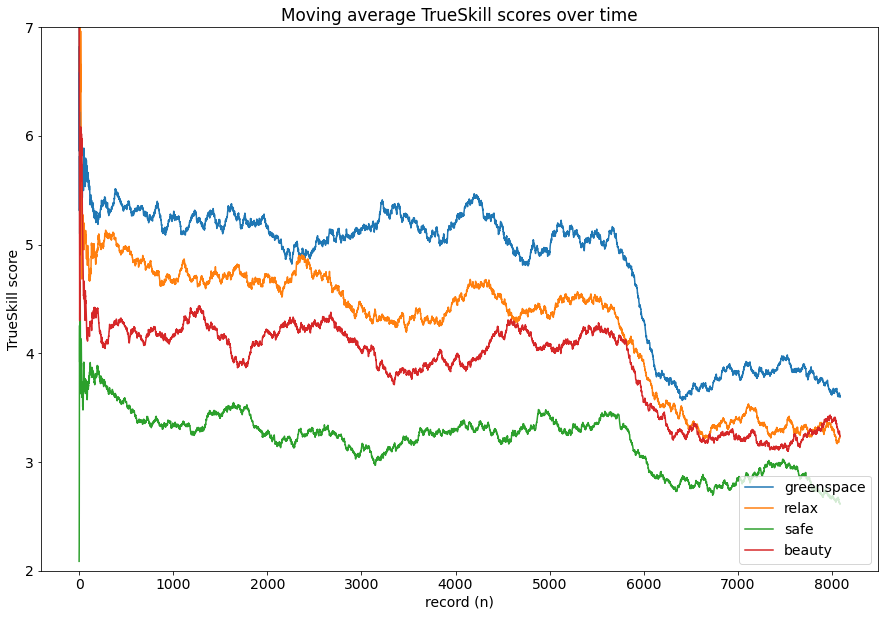

In [46]:
be.plotTSScores(saveFile=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


completed calculating moving avg scores


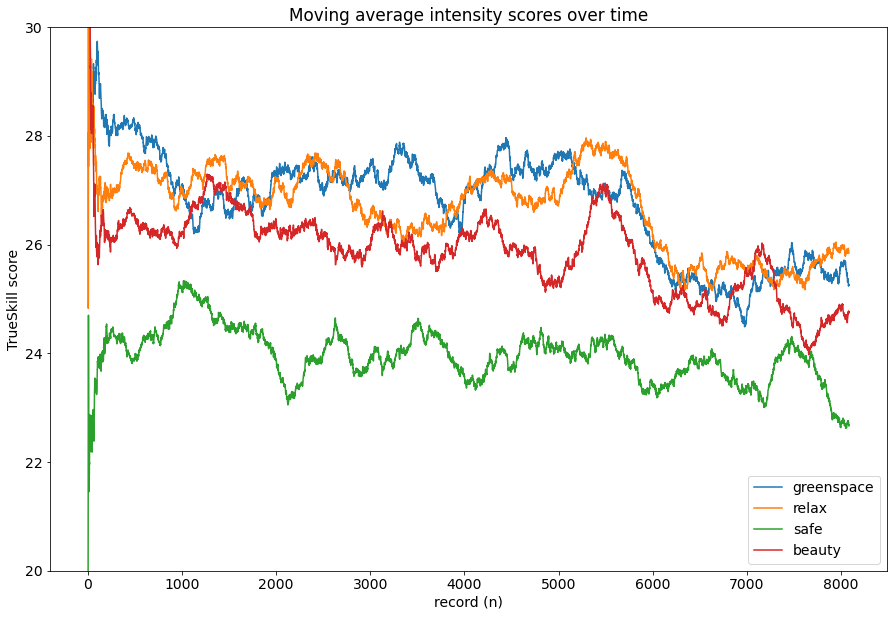

In [66]:
be.plotIntensityScores(saveFile=True)

mTurkAnalyzer.ipynb:126: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  "        return(newDF)\n",


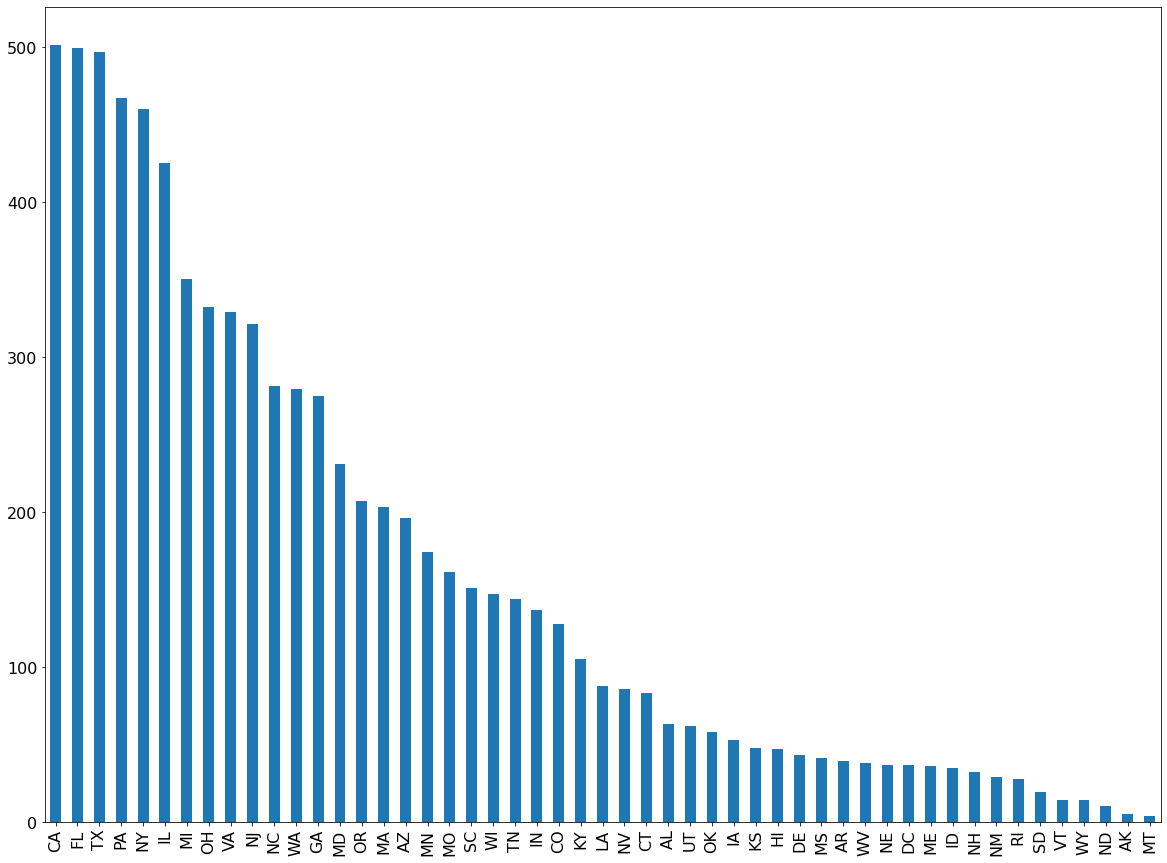

In [29]:
mta.getNumRecordsByState()

In [57]:
statsDict = mta.calcTimeQuartileDiffs(absVal=True,cutOff=50)
statsDict['abs_cont_outcome_relax']

,mean,std,n,pVal,quartile
0,38.159369,12.569463,1964,-9999.000000,q1
1,37.867108,13.033372,1964,0.237285,q2
2,38.073829,12.503162,1964,0.415370,q3
3,37.632383,12.575041,1964,0.094596,q4
